In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

In [3]:
print(train_data.shape)

(60000, 28, 28)


In [4]:
train_data = tf.pad(train_data, [[0, 0], [2, 2], [2, 2]]) / 255
test_data = tf.pad(test_data, [[0, 0], [2, 2], [2, 2]]) / 255

In [5]:
train_data = tf.expand_dims(train_data, 3)
test_data = tf.expand_dims(test_data, 3)
print(train_data.shape, test_data.shape)

(60000, 32, 32, 1) (10000, 32, 32, 1)


In [6]:
x_val = train_data[:2000,:,:,:]
y_val = train_labels[:2000]
x_train = train_data[2000:,:,:,:]
y_train = train_labels[2000:]

In [7]:
# Le-Net
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=6, kernel_size=5, activation='tanh', input_shape=x_train.shape[1:]))
model.add(keras.layers.AveragePooling2D(2))       # 14 * 14
model.add(keras.layers.Conv2D(filters=16, kernel_size=5, activation='tanh'))      # 10 * 10
model.add(keras.layers.AveragePooling2D(2))      # 5 * 5
model.add(keras.layers.Conv2D(filters=120, kernel_size=5, activation='tanh'))     # 1 * 1
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(84, activation='tanh'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [9]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [10]:
history = model.fit(x_train, y_train, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
1813/1813 [==============================] - 15s 8ms/step - loss: 0.2244 - accuracy: 0.9319 - val_loss: 0.1146 - val_accuracy: 0.9630
Epoch 2/40
1813/1813 [==============================] - 11s 6ms/step - loss: 0.0875 - accuracy: 0.9723 - val_loss: 0.0793 - val_accuracy: 0.9790
Epoch 3/40
1813/1813 [==============================] - 9s 5ms/step - loss: 0.0598 - accuracy: 0.9813 - val_loss: 0.0811 - val_accuracy: 0.9785
Epoch 4/40
1813/1813 [==============================] - 9s 5ms/step - loss: 0.0470 - accuracy: 0.9853 - val_loss: 0.0644 - val_accuracy: 0.9830
Epoch 5/40
1813/1813 [==============================] - 9s 5ms/step - loss: 0.0369 - accuracy: 0.9880 - val_loss: 0.0686 - val_accuracy: 0.9830
Epoch 6/40
1813/1813 [==============================] - 9s 5ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0565 - val_accuracy: 0.9850
Epoch 7/40
1813/1813 [==============================] - 9s 5ms/step - loss: 0.0261 - accuracy: 0.9920 - val_loss: 0.0554 - val_accurac

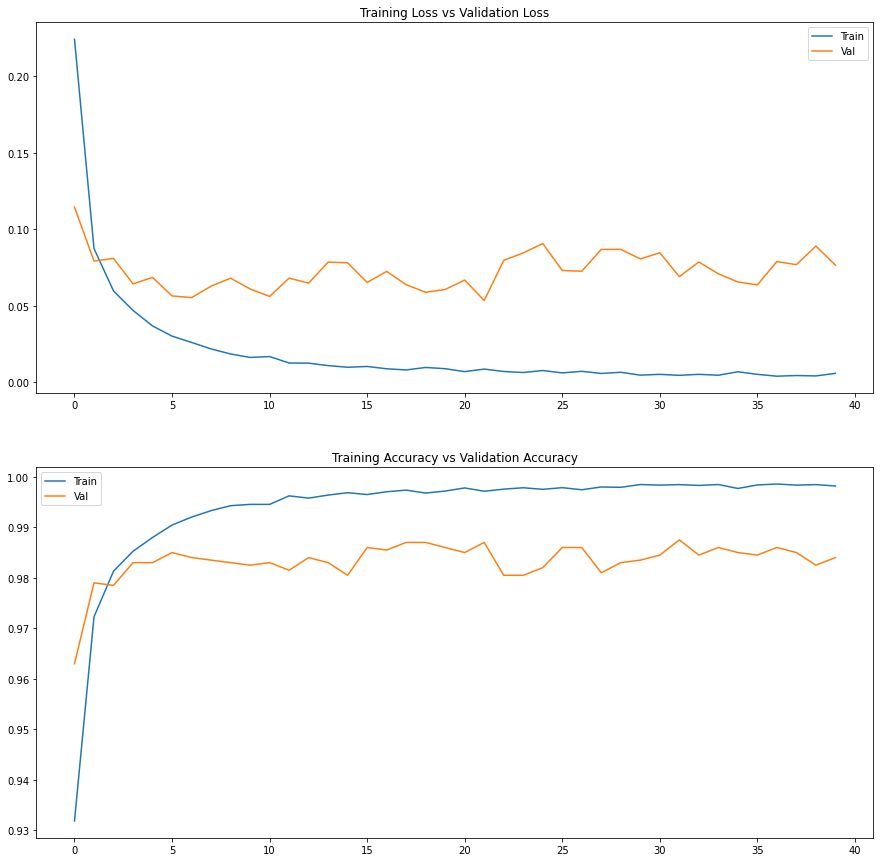

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(15,15)) 
axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])  
axs[1].plot(history.history['accuracy']) 
axs[1].plot(history.history['val_accuracy']) 
axs[1].title.set_text('Training Accuracy vs Validation Accuracy') 
axs[1].legend(['Train', 'Val'])

In [13]:
model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0628 - accuracy: 0.9877


[0.06276597082614899, 0.9876999855041504]